In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [84]:
# Load the Dataset
data = pd.read_csv("Stroke_Dataset.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [85]:
data.shape

(5110, 12)

In [86]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [88]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [89]:
data.duplicated().sum()

0

### **Memisahkan Fitur Kategorikal dan Numerik**

**1. Kolom Kategoris**

In [90]:
cat_col = [colm for colm in data.columns if data[colm].dtype == "O"]
cat_col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [91]:
data[cat_col].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [92]:
data[cat_col].isnull()

,gender,ever_married,work_type,Residence_type,smoking_status
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5105,False,False,False,False,False
5106,False,False,False,False,False
5107,False,False,False,False,False
5108,False,False,False,False,False


In [93]:
data[cat_col].isnull().sum()

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [94]:
Categorical = data[cat_col]
Categorical.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [95]:
Categorical.shape

(5110, 5)

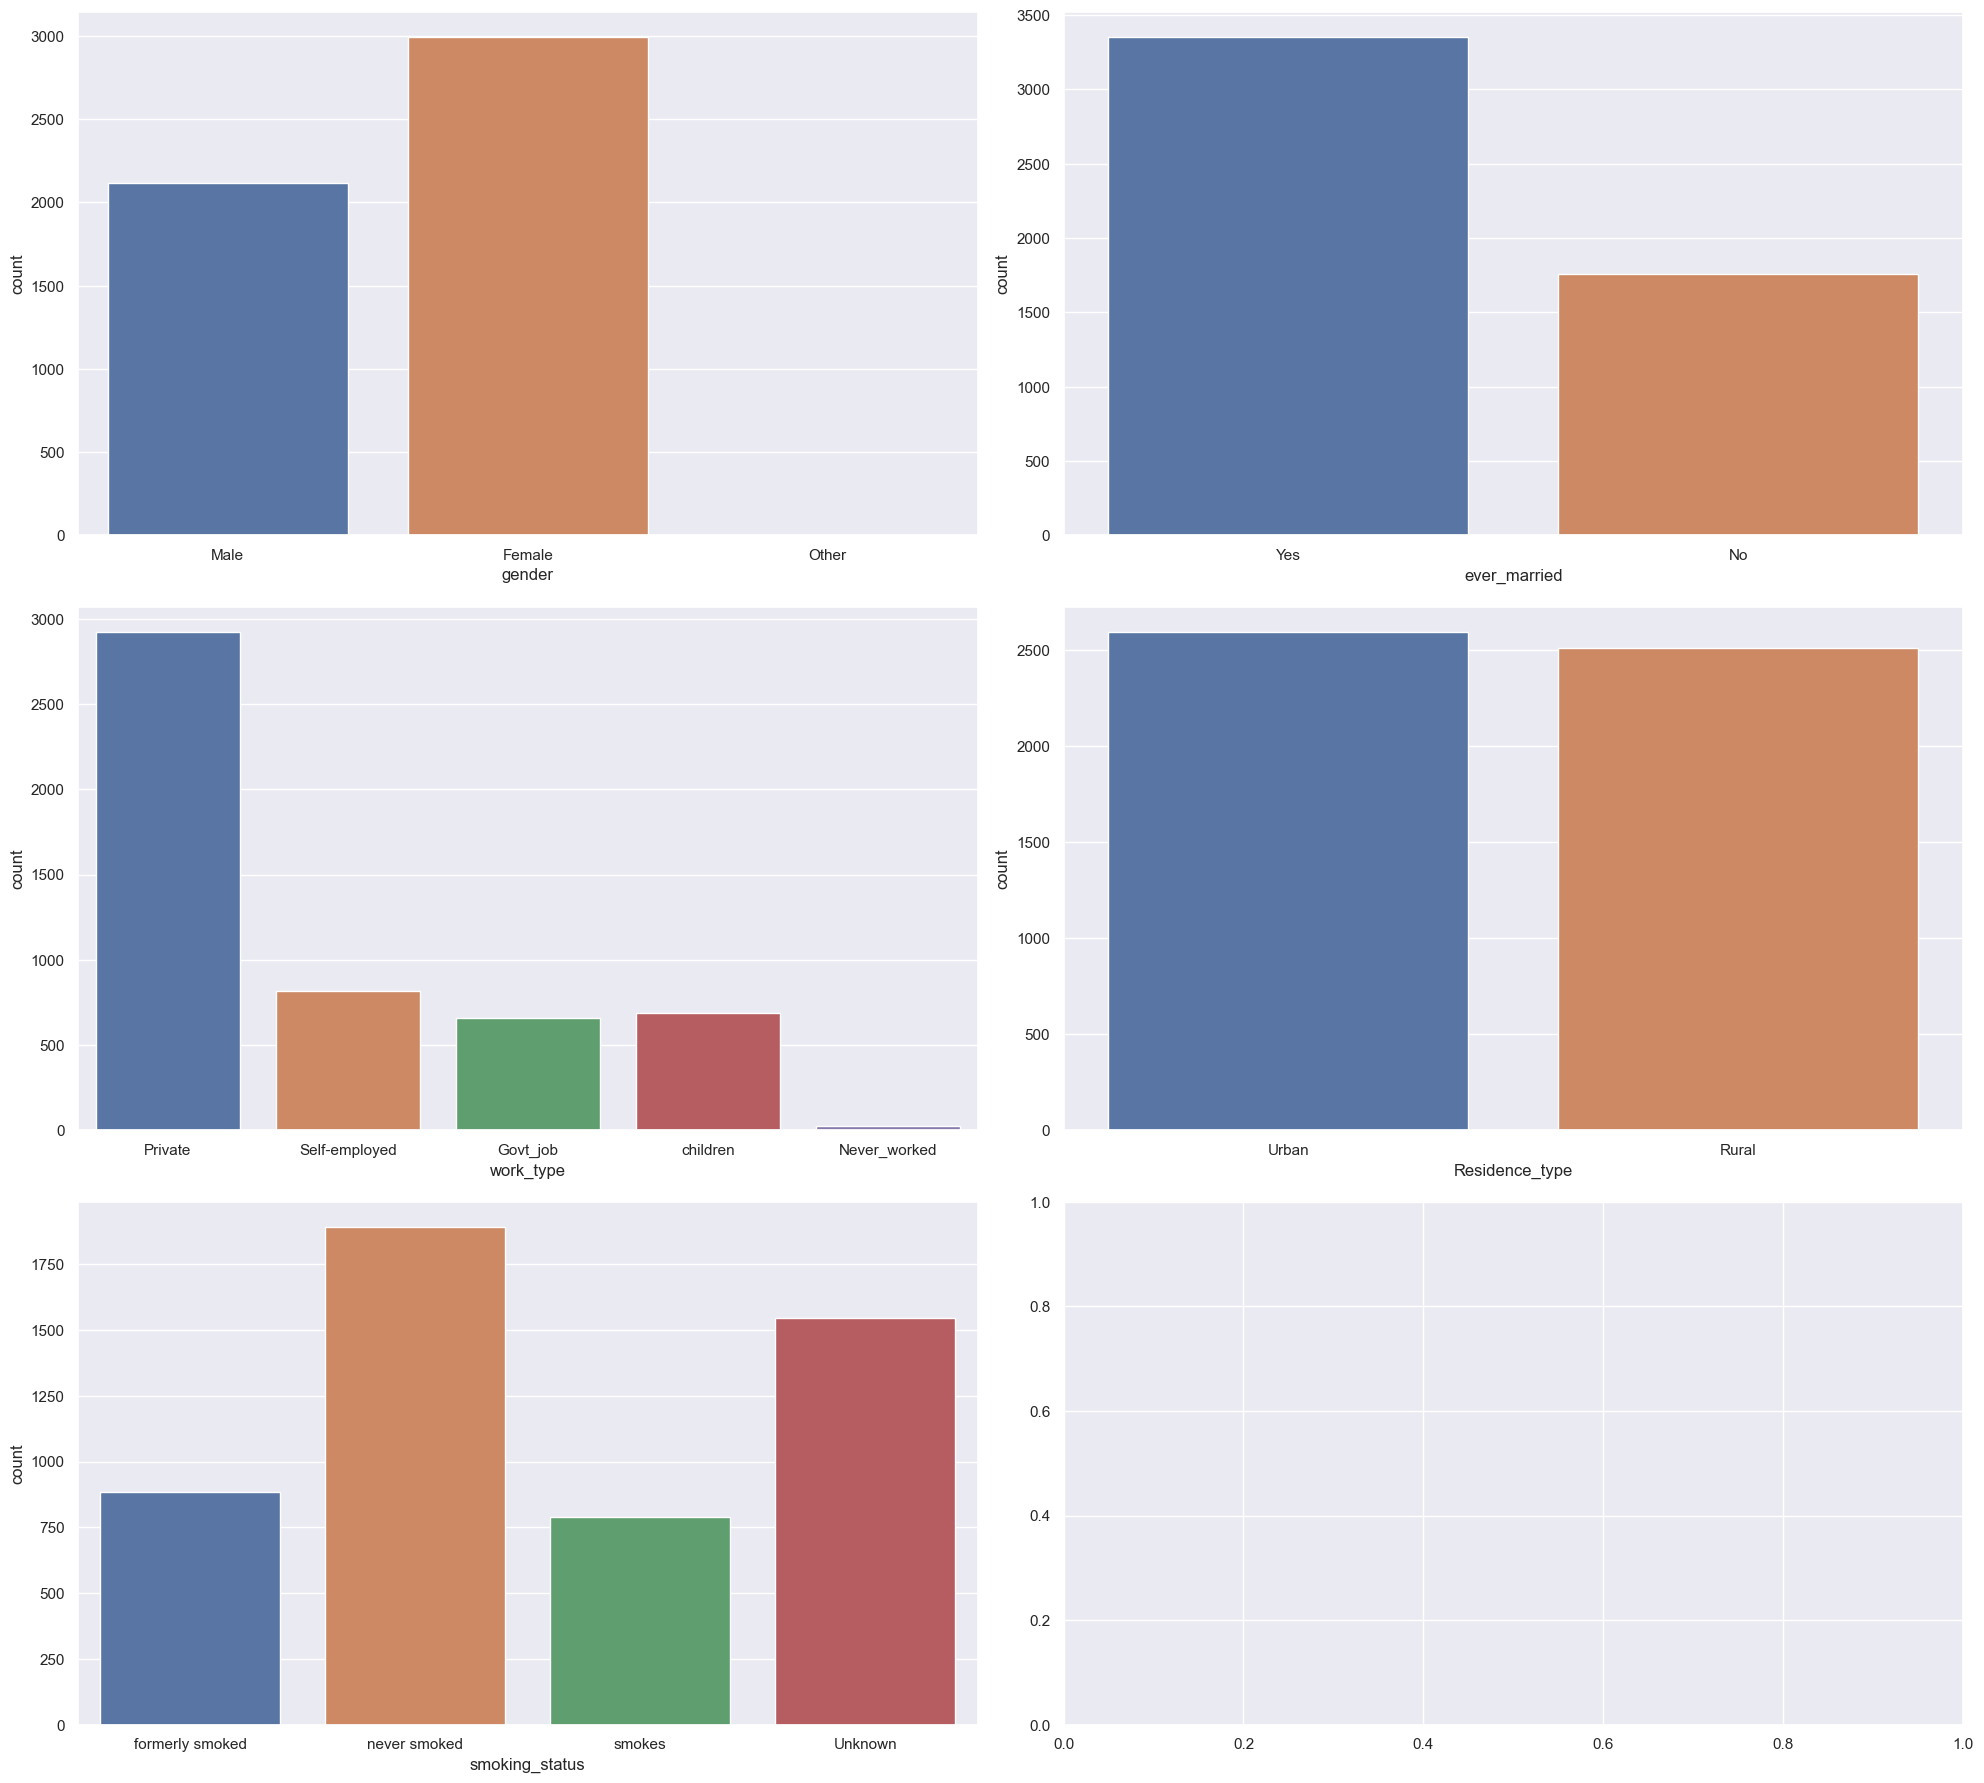

In [96]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 18))

sns.countplot(x='gender', data=data, ax=axarr[0, 0])
sns.countplot(x='ever_married', data=data, ax=axarr[0, 1])
sns.countplot(x='work_type', data=data, ax=axarr[1, 0])
sns.countplot(x='Residence_type', data=data, ax=axarr[1, 1])
sns.countplot(x='smoking_status', data=data, ax=axarr[2, 0])


# Adjust the layout for better visualization
plt.tight_layout()
plt.show()

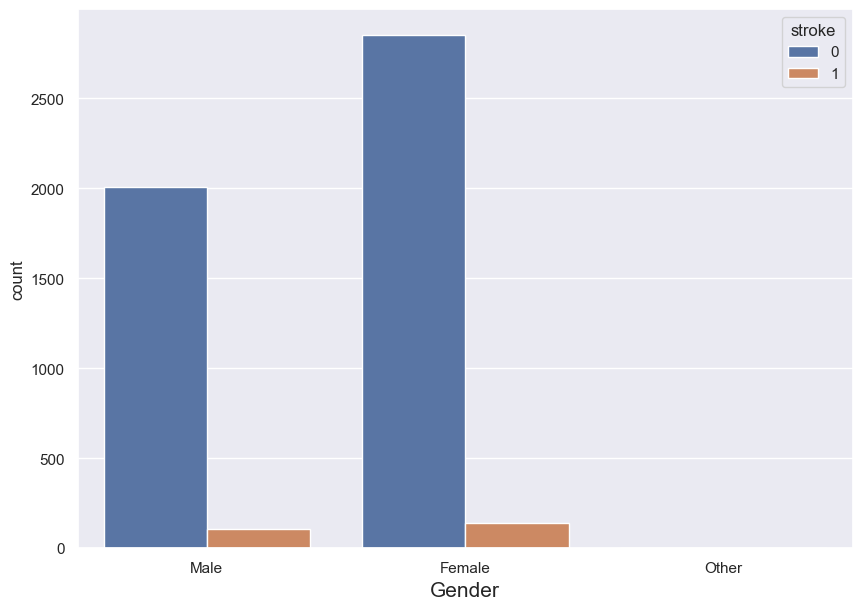

In [97]:
## Gender

plt.figure(figsize = (10,7))
sns.countplot(data=df,x='gender',hue='stroke')
plt.xlabel("Gender",fontsize = 15)
plt.show()

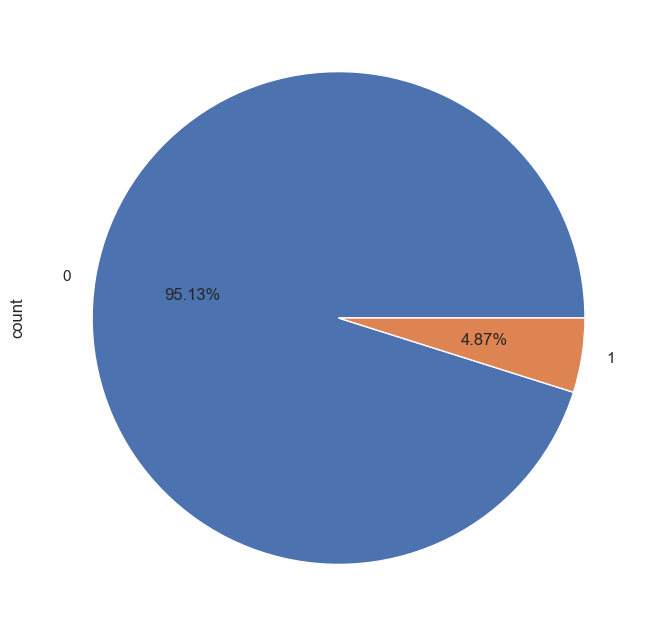

In [98]:
plt.figure(figsize=(8,8))
df['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [99]:
#Ever married
data['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

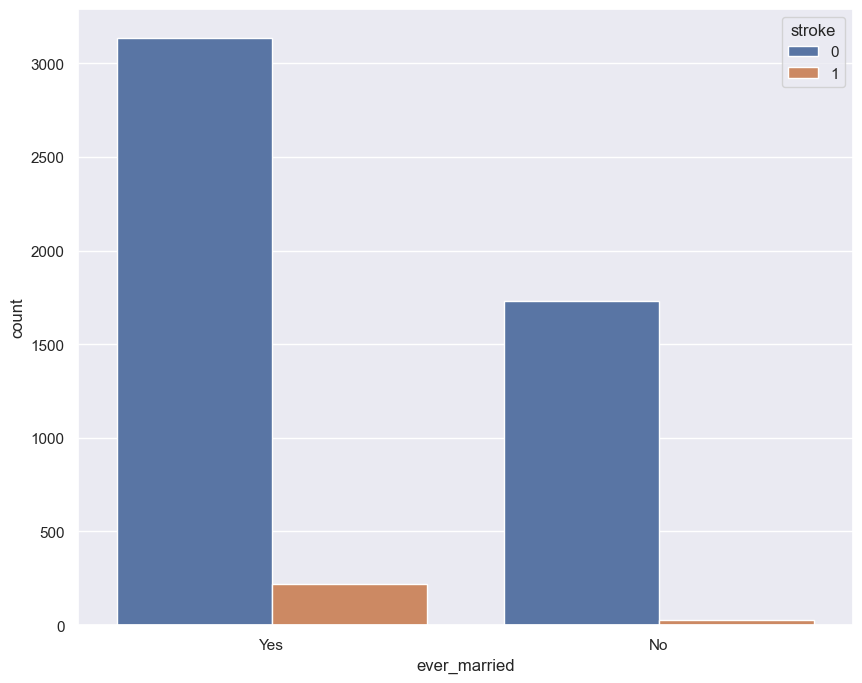

In [100]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.show()


In [101]:
## Work type

data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [102]:
data['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

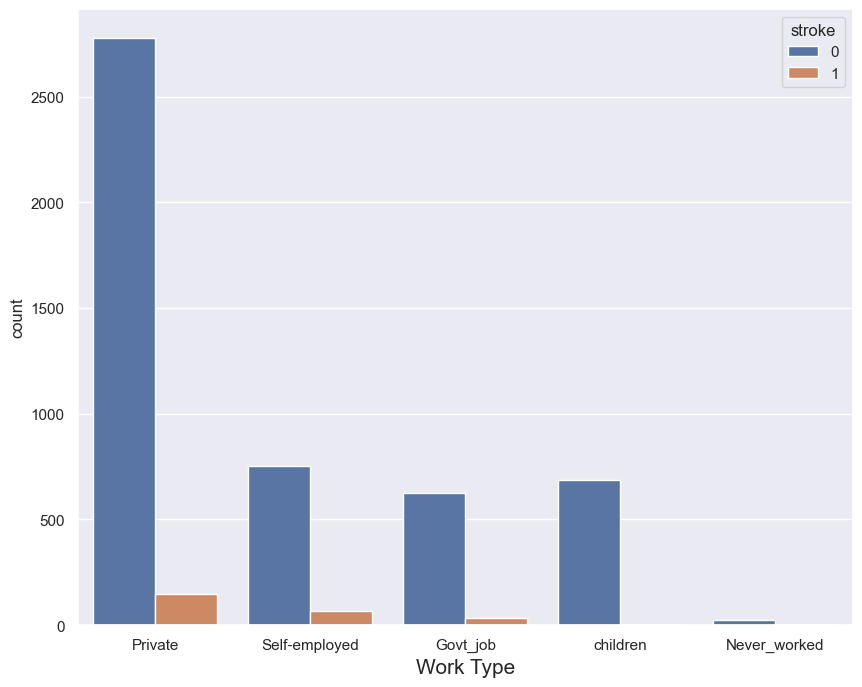

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='work_type',hue='stroke')
plt.xlabel("Work Type",fontsize = 15)
plt.show()

**Pengkodean variabel kategori**

In [104]:
lr = LabelEncoder

In [105]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
le = LabelEncoder()
for col in cols:
    Categorical[col] = le.fit_transform(Categorical[col])

In [106]:
Categorical.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2


**2. Kolom Numerik**

In [107]:
Num_col = [colm for colm in data.columns if data[colm].dtype != "O" ]
Num_col

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [108]:
data[Num_col].head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [109]:
data[Num_col].isnull().sum()

id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [110]:
data[Num_col].shape

(5110, 7)

In [111]:
Numerical = data[Num_col]
Numerical.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


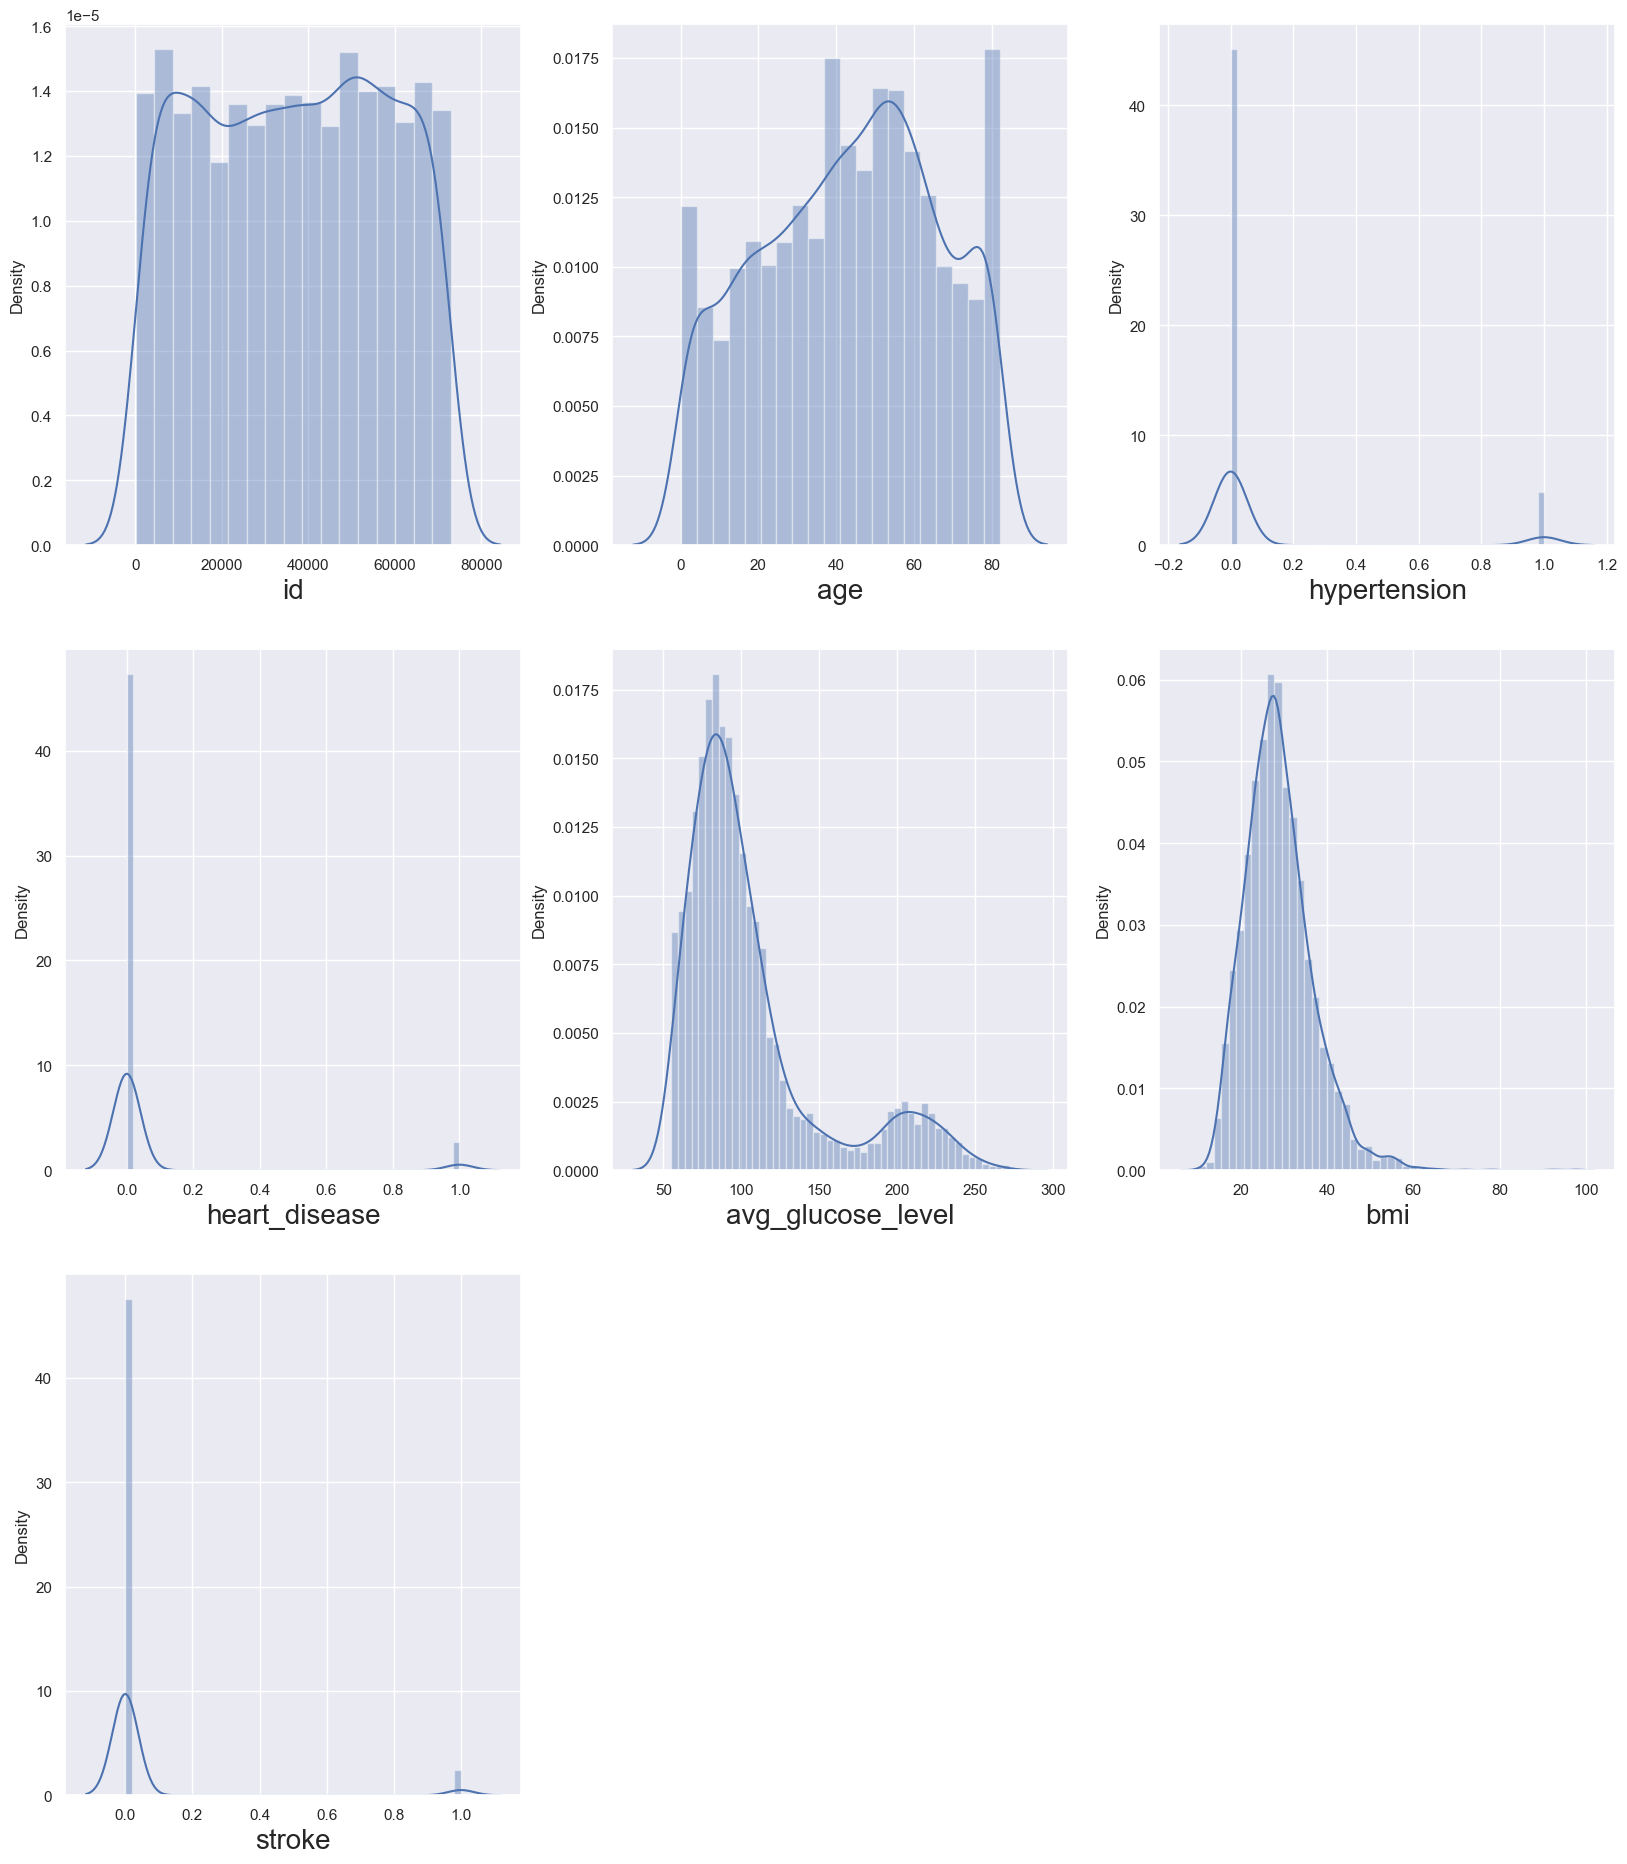

In [112]:
plt.figure(figsize=(20,23))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

## filling missing values

In [113]:
Numerical.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [114]:
Numerical["bmi"].isnull().sum()

201

In [115]:
Numerical["bmi"] = Numerical["bmi"].fillna(Numerical["bmi"].mean())

In [116]:
Numerical.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [117]:
Numerical["avg_glucose_level"] = np.log(Numerical["avg_glucose_level"])
Numerical["bmi"] = np.log(Numerical["bmi"])

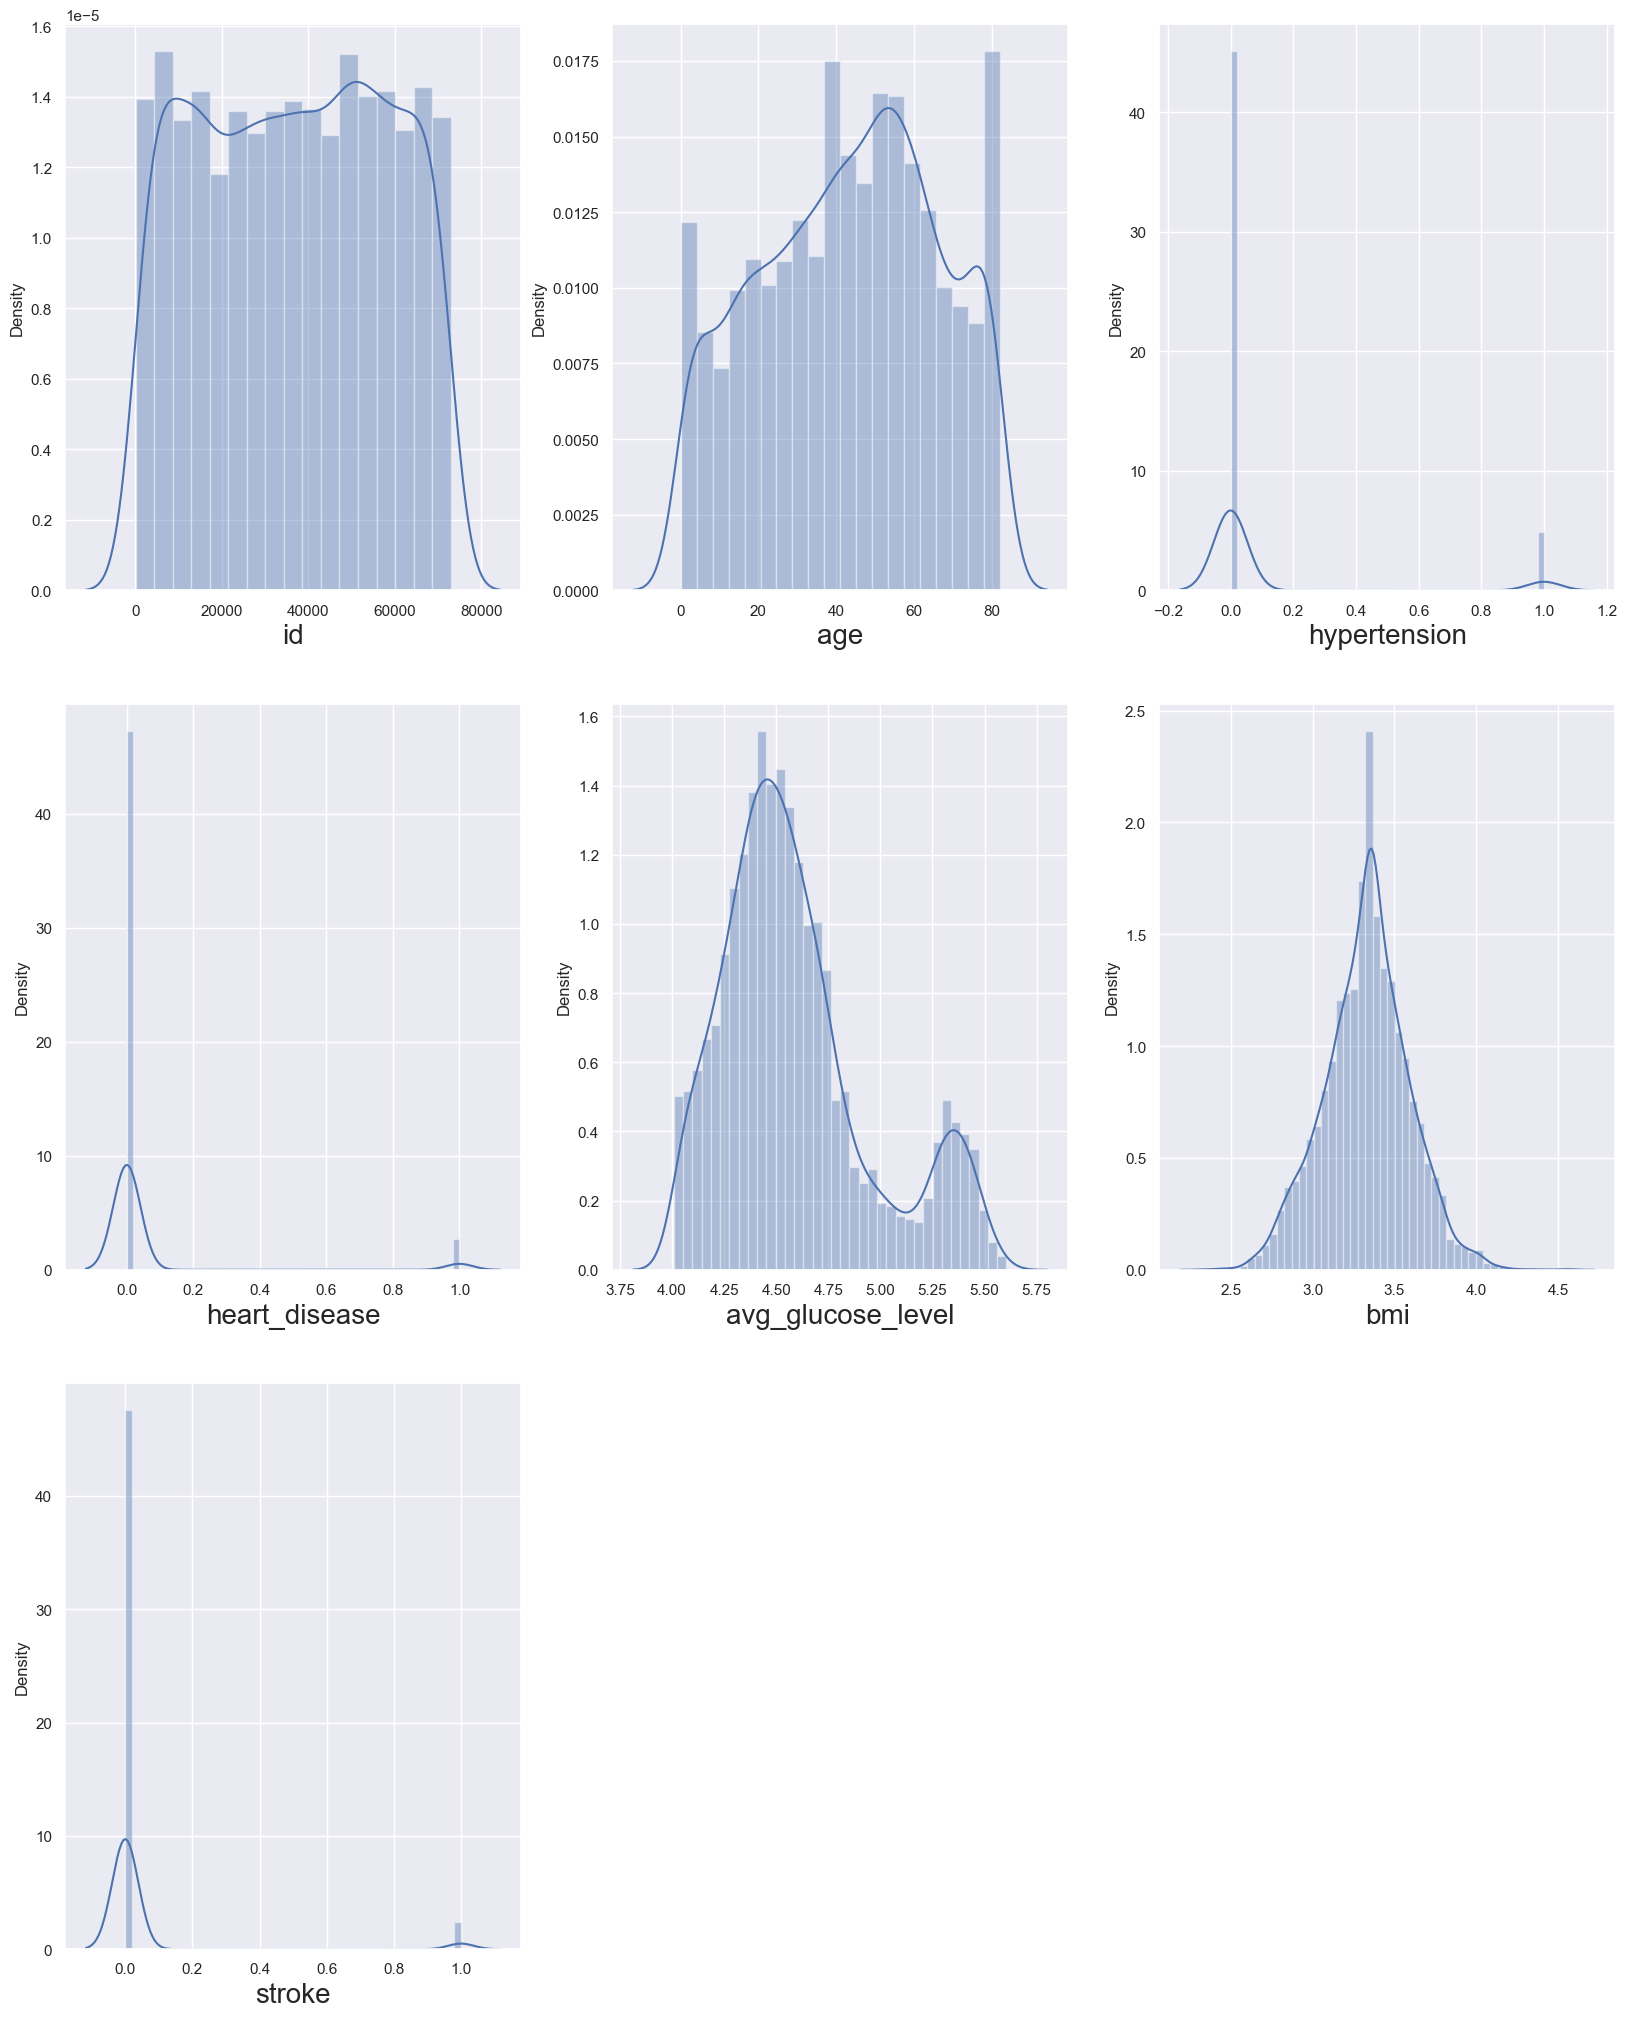

In [118]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

In [119]:
#drop not required column
Numerical.drop(columns=["id"],inplace = True)

In [120]:
Numerical.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,5.432367,3.600048,1
1,61.0,0,0,5.309307,3.363608,1
2,80.0,0,1,4.662684,3.481240,1
3,49.0,0,0,5.143008,3.538057,1
4,79.0,1,0,5.159745,3.178054,1


More men than women had stroke attack.


In [121]:
## Smoking Features

data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

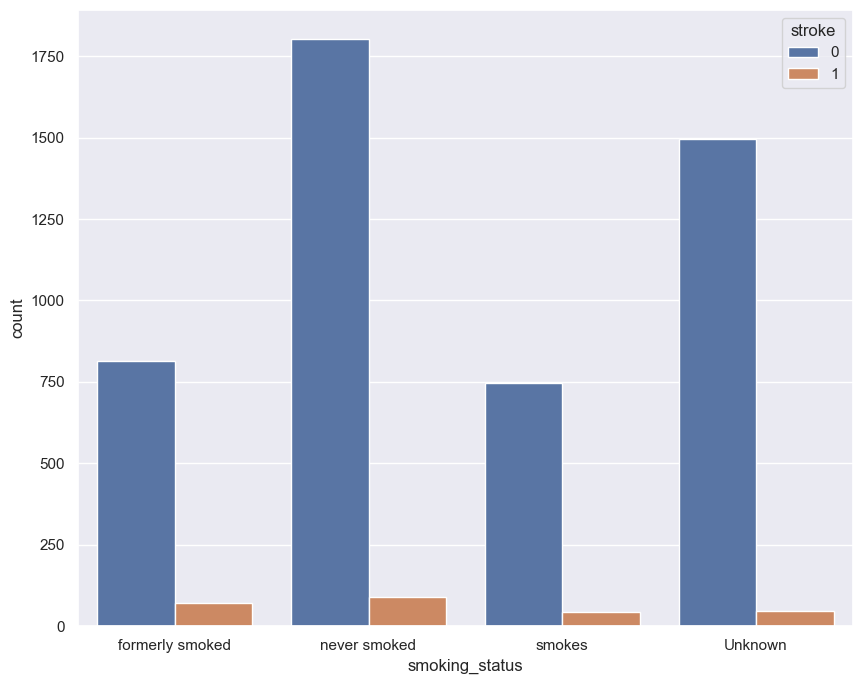

In [122]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='smoking_status',hue='stroke')
plt.show()

<Axes: >

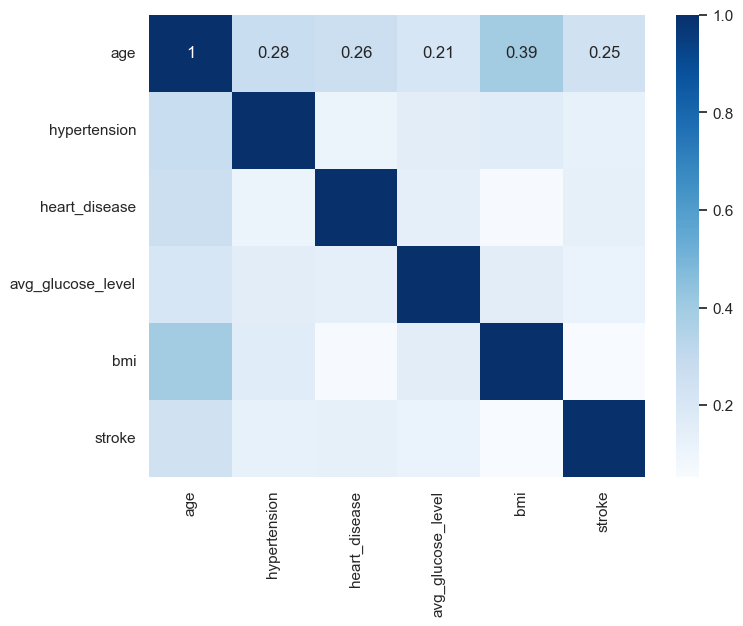

In [123]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,6))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

### **Concatenate Categorical and Numerical**

In [124]:
data = pd.concat([Categorical,Numerical],axis=1)
data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,5.432367,3.600048,1
1,0,1,3,0,2,61.0,0,0,5.309307,3.363608,1
2,1,1,2,0,2,80.0,0,1,4.662684,3.481240,1
3,0,1,2,1,3,49.0,0,0,5.143008,3.538057,1
4,0,1,3,0,2,79.0,1,0,5.159745,3.178054,1


In [125]:
data.shape

(5110, 11)

In [126]:
data.describe()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,0.656164,2.167710,0.508023,1.376908,43.226614,0.097456,0.054012,4.592465,3.329807,0.048728
std,0.493044,0.475034,1.090293,0.499985,1.071534,22.612647,0.296607,0.226063,0.361985,0.259888,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,4.009513,2.332144,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,25.000000,0.000000,0.000000,4.346982,3.169686,0.000000
50%,0.000000,1.000000,2.000000,1.000000,2.000000,45.000000,0.000000,0.000000,4.520538,3.346389,0.000000
75%,1.000000,1.000000,3.000000,1.000000,2.000000,61.000000,0.000000,0.000000,4.736988,3.490429,0.000000
max,2.000000,1.000000,4.000000,1.000000,3.000000,82.000000,1.000000,1.000000,5.604846,4.580877,1.000000


In [127]:
data['Residence_type'].value_counts()

Residence_type
1    2596
0    2514
Name: count, dtype: int64

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   ever_married       5110 non-null   int32  
 2   work_type          5110 non-null   int32  
 3   Residence_type     5110 non-null   int32  
 4   smoking_status     5110 non-null   int32  
 5   age                5110 non-null   float64
 6   hypertension       5110 non-null   int64  
 7   heart_disease      5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


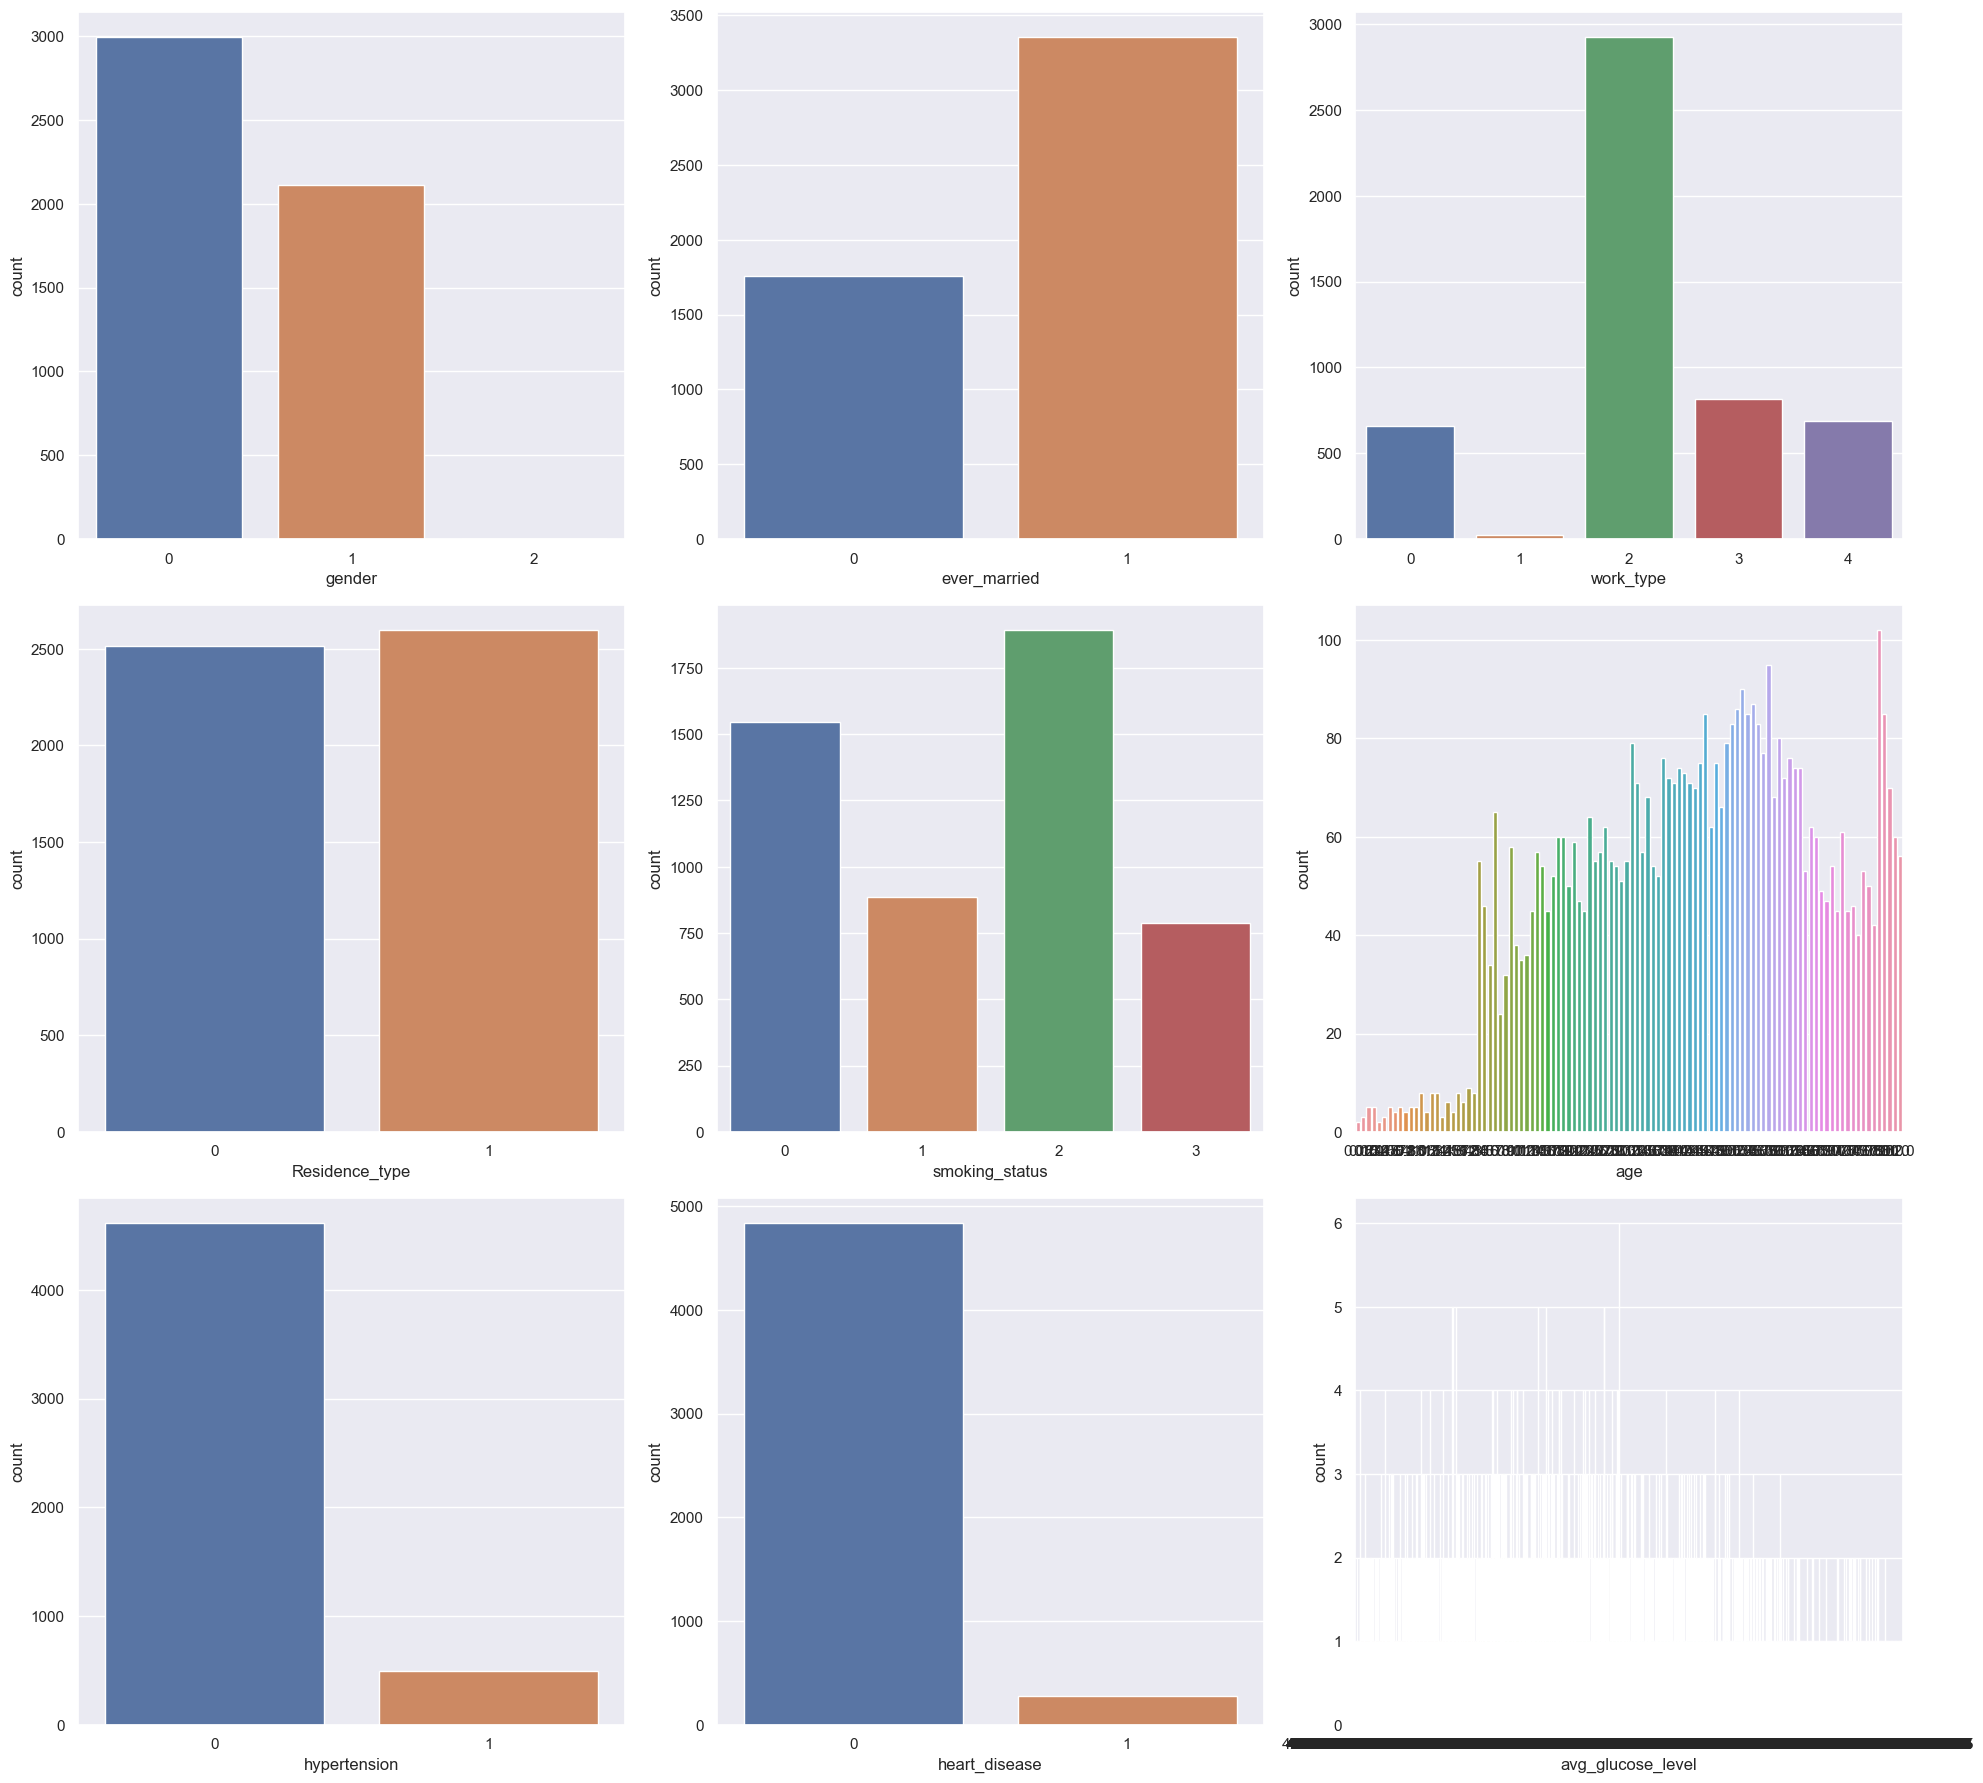

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axarr = plt.subplots(3, 3, figsize=(20, 18))  # Change to 3x3 grid

sns.countplot(x='gender', data=data, ax=axarr[0, 0])
sns.countplot(x='ever_married', data=data, ax=axarr[0, 1])
sns.countplot(x='work_type', data=data, ax=axarr[0, 2])
sns.countplot(x='Residence_type', data=data, ax=axarr[1, 0])
sns.countplot(x='smoking_status', data=data, ax=axarr[1, 1])
sns.countplot(x='age', data=data, ax=axarr[1, 2])
sns.countplot(x='hypertension', data=data, ax=axarr[2, 0])
sns.countplot(x='heart_disease', data=data, ax=axarr[2, 1])
sns.countplot(x='avg_glucose_level', data=data, ax=axarr[2, 2])

# Remove the last two subplots (axarr[2, 3] and axarr[2, 4]) as there are only 9 countplots

# Adjust the layout for better visualization
plt.tight_layout()
plt.show()


**Split Independent and Dependent Features**

In [130]:
X = data.drop(columns = ["stroke"],axis = 1)
Y = data["stroke"] 

In [131]:
X

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,1,67.0,0,1,5.432367,3.600048
1,0,1,3,0,2,61.0,0,0,5.309307,3.363608
2,1,1,2,0,2,80.0,0,1,4.662684,3.481240
3,0,1,2,1,3,49.0,0,0,5.143008,3.538057
4,0,1,3,0,2,79.0,1,0,5.159745,3.178054
...,...,...,...,...,...,...,...,...,...,...
5105,0,1,2,1,2,80.0,1,0,4.427836,3.363608
5106,0,1,3,1,2,81.0,0,0,4.829912,3.688879
5107,0,1,3,0,2,35.0,0,0,4.418720,3.421000
5108,1,1,2,0,1,51.0,0,0,5.113733,3.242592


In [132]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [134]:
X_train

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
802,1,1,3,0,1,79.00,0,0,4.724197,3.349904
3927,0,1,2,1,0,62.00,0,0,4.480967,3.591818
2337,0,0,2,0,2,21.00,0,0,4.086312,3.517498
3910,1,1,0,1,1,31.00,0,0,4.185099,3.414443
1886,0,0,2,0,2,31.00,0,0,4.088159,2.990720
...,...,...,...,...,...,...,...,...,...,...
4426,1,1,0,0,2,43.00,0,0,4.477337,3.421000
466,0,1,2,0,3,61.00,1,0,5.136093,4.097672
3092,0,0,4,1,0,1.16,0,0,4.577593,2.879198
3772,1,1,3,0,1,80.00,0,0,5.278523,3.433987


In [135]:
X_train.shape

(4088, 10)

In [136]:
Y_train.shape

(4088,)

In [137]:
X_test

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
4688,1,0,3,0,0,31.00,0,0,4.172077,3.135494
4478,1,1,3,0,2,40.00,0,0,4.178839,3.342862
3849,0,0,4,1,0,8.00,0,0,4.309725,3.113515
4355,0,1,3,0,2,79.00,1,0,4.339119,2.970414
3826,0,1,0,0,2,75.00,0,0,4.551453,3.303217
...,...,...,...,...,...,...,...,...,...,...
3605,1,0,4,0,0,1.88,0,0,4.969605,3.363608
4934,1,0,4,0,0,1.32,0,0,4.673016,3.363608
4835,1,1,3,0,1,49.00,1,0,4.781641,3.414443
4105,0,0,3,1,3,56.00,0,0,4.856940,3.214868


In [138]:
Y_train

802     0
3927    0
2337    0
3910    0
1886    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 4088, dtype: int64

In [139]:
# make xboost classifier
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()

In [140]:
xgboost_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [141]:
xgboost_predction = xgboost_model.predict(X_test)

In [142]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, xgboost_predction))

[[954   6]
 [ 56   6]]


In [143]:
print(classification_report(Y_test, xgboost_predction))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.50      0.10      0.16        62

    accuracy                           0.94      1022
   macro avg       0.72      0.55      0.57      1022
weighted avg       0.92      0.94      0.92      1022



In [144]:
import pickle

pickle.dump(xgboost_model,open('xgb.pkl','wb'))

In [147]:
data['Residence_type'].value_counts()

Residence_type
1    2596
0    2514
Name: count, dtype: int64

In [148]:
data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,5.432367,3.600048,1
1,0,1,3,0,2,61.0,0,0,5.309307,3.363608,1
2,1,1,2,0,2,80.0,0,1,4.662684,3.481240,1
3,0,1,2,1,3,49.0,0,0,5.143008,3.538057,1
4,0,1,3,0,2,79.0,1,0,5.159745,3.178054,1


In [145]:
# save dataset
data.to_csv('Stroke_Dataset_New.csv', index=False)

In [146]:
data.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

In [149]:
data.describe()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,0.656164,2.167710,0.508023,1.376908,43.226614,0.097456,0.054012,4.592465,3.329807,0.048728
std,0.493044,0.475034,1.090293,0.499985,1.071534,22.612647,0.296607,0.226063,0.361985,0.259888,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,4.009513,2.332144,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,25.000000,0.000000,0.000000,4.346982,3.169686,0.000000
50%,0.000000,1.000000,2.000000,1.000000,2.000000,45.000000,0.000000,0.000000,4.520538,3.346389,0.000000
75%,1.000000,1.000000,3.000000,1.000000,2.000000,61.000000,0.000000,0.000000,4.736988,3.490429,0.000000
max,2.000000,1.000000,4.000000,1.000000,3.000000,82.000000,1.000000,1.000000,5.604846,4.580877,1.000000


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   ever_married       5110 non-null   int32  
 2   work_type          5110 non-null   int32  
 3   Residence_type     5110 non-null   int32  
 4   smoking_status     5110 non-null   int32  
 5   age                5110 non-null   float64
 6   hypertension       5110 non-null   int64  
 7   heart_disease      5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB
